In [34]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("data/cycledata_utf8.csv", delimiter=";", encoding= "utf-8")

In [5]:
df.head(10)


,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,1,1,...,1,"0,00",-,-,-,-,-,-,-,-
1,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,2,5,...,5,"0,00",-,-,-,-,-,-,-,-
2,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt i retning Danmarksplass,5,...,5,"0,00",-,-,-,-,-,-,-,-
3,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt i retning Florida,1,...,1,"0,00",-,-,-,-,-,-,-,-
4,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T00:00+02:00,2022-08-31T01:00+02:00,2022-08-31,00:00,01:00,Totalt,6,...,6,"0,00",-,-,-,-,-,-,-,-
5,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,1,0,...,0,"100,00",-,-,-,-,-,-,-,-
6,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,2,0,...,0,"100,00",-,-,-,-,-,-,-,-
7,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt i retning Danmarksplass,0,...,0,"100,00",-,-,-,-,-,-,-,-
8,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt i retning Florida,0,...,0,"100,00",-,-,-,-,-,-,-,-
9,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2022-08-31T01:00+02:00,2022-08-31T02:00+02:00,2022-08-31,01:00,02:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-


In [6]:
df.columns

Index(['Trafikkregistreringspunkt', 'Navn', 'Vegreferanse', 'Fra', 'Til',
       'Dato', 'Fra tidspunkt', 'Til tidspunkt', 'Felt', 'Trafikkmengde',
       'Dekningsgrad (%)', 'Antall timer total', 'Antall timer inkludert',
       'Antall timer ugyldig', 'Ikke gyldig lengde', 'Lengdekvalitetsgrad (%)',
       '< 5,6m', '>= 5,6m', '5,6m - 7,6m', '7,6m - 12,5m', '12,5m - 16,0m',
       '>= 16,0m', '16,0m - 24,0m', '>= 24,0m'],
      dtype='object')

In [7]:
#Sortere til de viktige colonnene:

viktkigdf = df.loc[:,['Dato','Fra tidspunkt','Felt', 'Trafikkmengde']]

viktkigdf.head

<bound method NDFrame.head of              Dato Fra tidspunkt                            Felt  Trafikkmengde
0      2022-08-31         00:00                               1              1
1      2022-08-31         00:00                               2              5
2      2022-08-31         00:00  Totalt i retning Danmarksplass              5
3      2022-08-31         00:00        Totalt i retning Florida              1
4      2022-08-31         00:00                          Totalt              6
...           ...           ...                             ...            ...
43860  2023-08-31         12:00                               1             36
43861  2023-08-31         12:00                               2             30
43862  2023-08-31         12:00  Totalt i retning Danmarksplass             30
43863  2023-08-31         12:00        Totalt i retning Florida             36
43864  2023-08-31         12:00                          Totalt             66

[43865 rows x 4 colum

In [8]:
#get only totalt rows
dftot = viktkigdf[viktkigdf['Felt'] == 'Totalt']
dftot.head(10)

,Dato,Fra tidspunkt,Felt,Trafikkmengde
4,2022-08-31,00:00,Totalt,6
9,2022-08-31,01:00,Totalt,0
14,2022-08-31,02:00,Totalt,2
19,2022-08-31,03:00,Totalt,0
24,2022-08-31,04:00,Totalt,0
29,2022-08-31,05:00,Totalt,9
34,2022-08-31,06:00,Totalt,67
39,2022-08-31,07:00,Totalt,306
44,2022-08-31,08:00,Totalt,365
49,2022-08-31,09:00,Totalt,153


In [9]:
dfweather = pd.read_csv('data/weather.csv', on_bad_lines = 'warn')
dfweather.head(10)

Skipping line 36628: expected 6 fields, saw 10
Skipping line 36664: expected 6 fields, saw 10



,Dato,Tid,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke
0,2022-08-31,00:00,0.0,13.7,88.0,0.0
1,2022-08-31,00:10,0.0,13.9,87.0,0.0
2,2022-08-31,00:20,0.0,14.1,87.0,0.0
3,2022-08-31,00:30,0.0,14.1,87.0,0.0
4,2022-08-31,00:40,0.0,14.3,86.0,0.0
5,2022-08-31,00:50,0.0,14.3,86.0,0.0
6,2022-08-31,01:00,0.0,14.2,87.0,0.0
7,2022-08-31,01:10,0.0,14.4,87.0,0.0
8,2022-08-31,01:20,0.0,14.4,87.0,0.0
9,2022-08-31,01:30,0.0,14.5,87.0,0.0


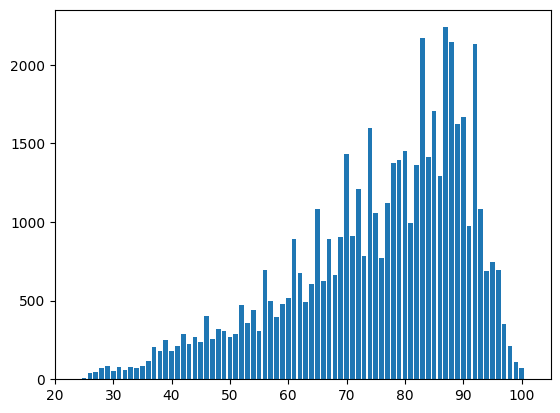

In [10]:


luftfuktighet = dfweather.loc[:,'Relativ luftfuktighet']

count = np.unique(luftfuktighet, return_counts=True)

luftfuktigheter = count[0]
luftfuktighetantall = count[1]

plt.bar(luftfuktigheter, luftfuktighetantall)
plt.xlim((20, 105))
plt.show()



In [11]:



dfweather['relative_luftfuktighet_categorized'] = pd.cut(dfweather['Relativ luftfuktighet'], bins=[0,50,80,101], labels=['0-49','50-79','80-100'])

dfweather.head(10)


,Dato,Tid,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke,relative_luftfuktighet_categorized
0,2022-08-31,00:00,0.0,13.7,88.0,0.0,80-100
1,2022-08-31,00:10,0.0,13.9,87.0,0.0,80-100
2,2022-08-31,00:20,0.0,14.1,87.0,0.0,80-100
3,2022-08-31,00:30,0.0,14.1,87.0,0.0,80-100
4,2022-08-31,00:40,0.0,14.3,86.0,0.0,80-100
5,2022-08-31,00:50,0.0,14.3,86.0,0.0,80-100
6,2022-08-31,01:00,0.0,14.2,87.0,0.0,80-100
7,2022-08-31,01:10,0.0,14.4,87.0,0.0,80-100
8,2022-08-31,01:20,0.0,14.4,87.0,0.0,80-100
9,2022-08-31,01:30,0.0,14.5,87.0,0.0,80-100


[  -8   -7   -6   -5   -4   -3   -2   -1    0    1    2    3    4    5
    6    7    8    9   10   11   12   13   14   15   16   17   18   19
   20   21   22   23   24   25   26   27 9999]
[  10   67   51   77  325  618  903  873 2726 1958 2333 2397 2182 2998
 2825 3284 3009 3364 3443 2788 3047 3002 2497 2399 1579 1041  937  577
  448  312  208   84   69   22    6    1   18]


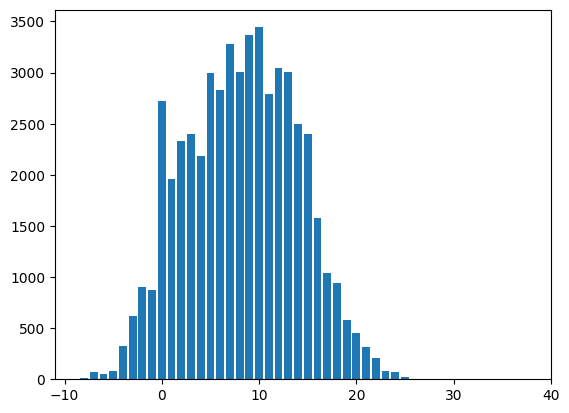

In [12]:

temperatur = np.array(dfweather.loc[:,'Lufttemperatur'])

integertemp = temperatur.astype('int')

temperaturcounts = np.unique(integertemp, return_counts = True)

li1 = temperaturcounts[0]
li2 = temperaturcounts[1]

print(li1)
print(li2)

plt.bar(li1,li2)
plt.xlim(integertemp.min() - 3, 40)
plt.show()



Skipping line 36628: expected 6 fields, saw 10
Skipping line 36664: expected 6 fields, saw 10



[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27]
[  10   67   51   77  325  618  903  873 2744 1958 2333 2397 2182 2998
 2825 3284 3009 3364 3443 2788 3047 3002 2497 2399 1579 1041  937  577
  448  312  208   84   69   22    6    1]


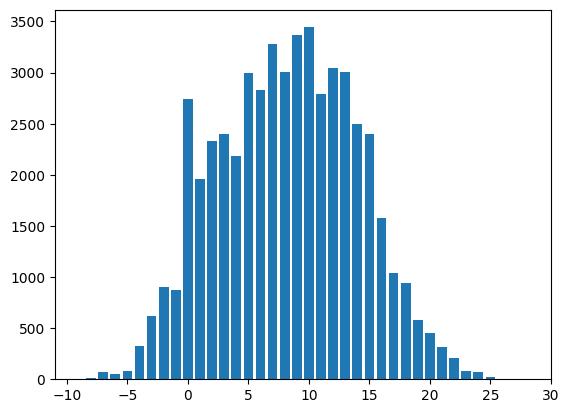

In [13]:

# def removenans(df):
#     for col in df.columns:
#         for i in range(len(df)):
#             if df.loc[i, col] == 9999.99:
#                 cou = 1
#                 while True:
#                     if df.loc[i-cou, col] != 9999.99:
#                         df.loc[i, col] = df.loc[i - cou,col]
#                         break
#                     else:
#                         cou+=1

def changena(df):
    for col in df.columns:
        for i in range(len(df)):
            if df.loc[i, col] == 9999.99:
                df.loc[i, col] = pd.NA

newdfweather = pd.read_csv('data/weather.csv', on_bad_lines = 'warn')

changena(newdfweather)

newdfweather.fillna(method="ffill")

temperatur2 = np.array(newdfweather.loc[:,'Lufttemperatur'])

integertemp2 = temperatur2.astype('int')

temperaturcounts2 = np.unique(integertemp2, return_counts = True)

li3 = temperaturcounts2[0]
li4 = temperaturcounts2[1]

print(li3)
print(li4)

plt.bar(li3,li4)
plt.xlim(integertemp2.min() - 3, integertemp2.max() + 3)
plt.show()




In [14]:


# print(newdfweather.head(10))

dftot_copy = dftot.copy()

dftot_copy['Lufttemperatur'] = 0
dftot_copy['Solskinstid'] = 0
dftot_copy['Relativ luftfuktighet'] = 0



dftot_copy.head(10)


,Dato,Fra tidspunkt,Felt,Trafikkmengde,Lufttemperatur,Solskinstid,Relativ luftfuktighet
4,2022-08-31,00:00,Totalt,6,0,0,0
9,2022-08-31,01:00,Totalt,0,0,0,0
14,2022-08-31,02:00,Totalt,2,0,0,0
19,2022-08-31,03:00,Totalt,0,0,0,0
24,2022-08-31,04:00,Totalt,0,0,0,0
29,2022-08-31,05:00,Totalt,9,0,0,0
34,2022-08-31,06:00,Totalt,67,0,0,0
39,2022-08-31,07:00,Totalt,306,0,0,0
44,2022-08-31,08:00,Totalt,365,0,0,0
49,2022-08-31,09:00,Totalt,153,0,0,0


In [15]:
newdfweather.head(10)

,Dato,Tid,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke
0,2022-08-31,00:00,0.0,13.7,88.0,0.0
1,2022-08-31,00:10,0.0,13.9,87.0,0.0
2,2022-08-31,00:20,0.0,14.1,87.0,0.0
3,2022-08-31,00:30,0.0,14.1,87.0,0.0
4,2022-08-31,00:40,0.0,14.3,86.0,0.0
5,2022-08-31,00:50,0.0,14.3,86.0,0.0
6,2022-08-31,01:00,0.0,14.2,87.0,0.0
7,2022-08-31,01:10,0.0,14.4,87.0,0.0
8,2022-08-31,01:20,0.0,14.4,87.0,0.0
9,2022-08-31,01:30,0.0,14.5,87.0,0.0


In [16]:


newdfweather['Datetime'] = pd.to_datetime(newdfweather['Dato'] + ' ' + newdfweather['Tid'])

newdfweather = newdfweather.drop(['Dato', 'Tid'], axis=1)

newdfweather.head(10)


,Solskinstid,Lufttemperatur,Relativ luftfuktighet,Vindstyrke,Datetime
0,0.0,13.7,88.0,0.0,2022-08-31 00:00:00
1,0.0,13.9,87.0,0.0,2022-08-31 00:10:00
2,0.0,14.1,87.0,0.0,2022-08-31 00:20:00
3,0.0,14.1,87.0,0.0,2022-08-31 00:30:00
4,0.0,14.3,86.0,0.0,2022-08-31 00:40:00
5,0.0,14.3,86.0,0.0,2022-08-31 00:50:00
6,0.0,14.2,87.0,0.0,2022-08-31 01:00:00
7,0.0,14.4,87.0,0.0,2022-08-31 01:10:00
8,0.0,14.4,87.0,0.0,2022-08-31 01:20:00
9,0.0,14.5,87.0,0.0,2022-08-31 01:30:00


In [17]:
dftot_copy.head(10)

,Dato,Fra tidspunkt,Felt,Trafikkmengde,Lufttemperatur,Solskinstid,Relativ luftfuktighet
4,2022-08-31,00:00,Totalt,6,0,0,0
9,2022-08-31,01:00,Totalt,0,0,0,0
14,2022-08-31,02:00,Totalt,2,0,0,0
19,2022-08-31,03:00,Totalt,0,0,0,0
24,2022-08-31,04:00,Totalt,0,0,0,0
29,2022-08-31,05:00,Totalt,9,0,0,0
34,2022-08-31,06:00,Totalt,67,0,0,0
39,2022-08-31,07:00,Totalt,306,0,0,0
44,2022-08-31,08:00,Totalt,365,0,0,0
49,2022-08-31,09:00,Totalt,153,0,0,0


In [19]:
dftot_copy['Datetime'] = pd.to_datetime(dftot_copy['Dato'] + ' ' + dftot_copy['Fra tidspunkt'])

dftot_copy1 = dftot_copy.drop(['Dato', 'Fra tidspunkt'], axis=1)

dftot_copy1

,Felt,Trafikkmengde,Lufttemperatur,Solskinstid,Relativ luftfuktighet,Datetime
4,Totalt,6,0,0,0,2022-08-31 00:00:00
9,Totalt,0,0,0,0,2022-08-31 01:00:00
14,Totalt,2,0,0,0,2022-08-31 02:00:00
19,Totalt,0,0,0,0,2022-08-31 03:00:00
24,Totalt,0,0,0,0,2022-08-31 04:00:00
...,...,...,...,...,...,...
43844,Totalt,221,0,0,0,2023-08-31 08:00:00
43849,Totalt,106,0,0,0,2023-08-31 09:00:00
43854,Totalt,43,0,0,0,2023-08-31 10:00:00
43859,Totalt,54,0,0,0,2023-08-31 11:00:00


In [22]:
merged_df = pd.merge(dftot_copy1, newdfweather[['Datetime', 'Solskinstid', 'Lufttemperatur', 'Relativ luftfuktighet']], on='Datetime', how='left')

# Add the columns from df2 to df1 when the times are the same
merged_df['Solskinstid'] = merged_df['Solskinstid_x'] + merged_df['Solskinstid_y']
merged_df['Lufttemperatur'] = merged_df['Lufttemperatur_x'] + merged_df['Lufttemperatur_y']
merged_df['Relativ luftfuktighet'] = merged_df['Relativ luftfuktighet_x'] + merged_df['Relativ luftfuktighet_y']

merged_df.drop(['Solskinstid_x', 'Solskinstid_y', 'Lufttemperatur_x', 'Lufttemperatur_y', 'Relativ luftfuktighet_x', 'Relativ luftfuktighet_y'], axis=1, inplace=True)

merged_df

,Felt,Trafikkmengde,Datetime,Solskinstid,Lufttemperatur,Relativ luftfuktighet
0,Totalt,6,2022-08-31 00:00:00,0.0,13.7,88.0
1,Totalt,0,2022-08-31 01:00:00,0.0,14.2,87.0
2,Totalt,2,2022-08-31 02:00:00,0.0,14.7,87.0
3,Totalt,0,2022-08-31 03:00:00,0.0,14.9,87.0
4,Totalt,0,2022-08-31 04:00:00,0.0,14.8,87.0
...,...,...,...,...,...,...
8768,Totalt,221,2023-08-31 08:00:00,NaN,NaN,NaN
8769,Totalt,106,2023-08-31 09:00:00,NaN,NaN,NaN
8770,Totalt,43,2023-08-31 10:00:00,NaN,NaN,NaN
8771,Totalt,54,2023-08-31 11:00:00,NaN,NaN,NaN


In [28]:
merged_df.dropna(how='any', inplace=True)
merged_df

,Felt,Trafikkmengde,Datetime,Solskinstid,Lufttemperatur,Relativ luftfuktighet
0,Totalt,6,2022-08-31 00:00:00,0.0,13.7,88.0
1,Totalt,0,2022-08-31 01:00:00,0.0,14.2,87.0
2,Totalt,2,2022-08-31 02:00:00,0.0,14.7,87.0
3,Totalt,0,2022-08-31 03:00:00,0.0,14.9,87.0
4,Totalt,0,2022-08-31 04:00:00,0.0,14.8,87.0
...,...,...,...,...,...,...
8755,Totalt,72,2023-08-30 19:00:00,0.0,15.7,71.0
8756,Totalt,50,2023-08-30 20:00:00,0.0,15.0,73.0
8757,Totalt,49,2023-08-30 21:00:00,0.0,14.3,75.0
8758,Totalt,32,2023-08-30 22:00:00,0.0,13.7,80.0


In [46]:

june_2023_data = merged_df[(merged_df['Datetime'] >= '2023-05-01') & (merged_df['Datetime'] <= '2023-06-30')]


unique_dates = june_2023_data['Datetime'].dt.date.unique()

solskinstideq = june_2023_data['Solskinstid'] * 10

fig = px.line(june_2023_data, x= 'Datetime', y= ['Relativ luftfuktighet', solskinstideq])
fig


In [ ]:


predictions = []

